## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path = '/kaggle/input/home-data-for-ml-course/'
train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')

## Train Data
Instead of just simply printing train.head() i have used '.style' which shows all columns.

I have selected ".background_gradient(cmap = "magma") but there are some other options like "plasma," "inferno," and "magma."

It will show color variation for numerical data only.

In [3]:
train.head(10).style.background_gradient(cmap= "magma")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

As we can see data with higer values have lighter color.

Instead of using '.describe()' I have used '.T' to show it vertically.

In [4]:
train.describe().T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
Id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [5]:
test.tail(10).style.background_gradient()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1449,2910,180,RM,21.000000,1470,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,Gd,TA,Av,GLQ,522.000000,Unf,0.000000,108.000000,630.000000,GasA,TA,Y,SBrkr,630,0,0,630,1.000000,0.000000,1,0,1,1,TA,3,Typ,0,nan,nan,nan,nan,0.000000,0.000000,nan,nan,Y,0,0,0,0,0,0,nan,nan,nan,0,4,2006,WD,Normal
1450,2911,160,RM,21.000000,1484,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,252.000000,Unf,0.000000,294.000000,546.000000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,5,Typ,0,nan,Attchd,1972.000000,Unf,1.000000,253.000000,TA,Fa,Y,0,0,0,0,0,0,nan,nan,nan,0,5,2006,WD,Normal
1451,2912,20,RL,80.000000,13384,Pave,nan,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.000000,TA,TA,PConc,TA,TA,Av,Rec,119.000000,BLQ,344.000000,641.000000,1104.000000,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.000000,0.000000,1,0,3,1,TA,8,Typ,1,TA,Attchd,1969.000000,RFn,1.000000,336.000000,TA,TA,Y,160,0,0,0,0,0,nan,nan,nan,0,5,2006,WD,Normal
1452,2913,160,RM,21.000000,1533,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,408.000000,Unf,0.000000,138.000000,546.000000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,5,Typ,0,nan,CarPort,1970.000000,Unf,1.000000,286.000000,TA,TA,Y,0,0,0,0,0,0,nan,nan,nan,0,12,2006,WD,Abnorml
1453,2914,160,RM,21.000000,1526,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.000000,546.000000,546.000000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,5,Typ,0,nan,nan,nan,nan,0.000000,0.000000,nan,nan,Y,0,34,0,0,0,0,nan,GdPrv,nan,0,6,2006,WD,Normal
1454,2915,160,RM,21.000000,1936,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.000000,546.000000,546.000000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,5,Typ,0,nan,nan,nan,nan,0.000000,0.000000,nan,nan,Y,0,0,0,0,0,0,nan,nan,nan,0,6,2006,WD,Normal
1455,2916,160,RM,21.000000,1894,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,252.000000,Unf,0.000000,294.000000,546.000000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,6,Typ,0,nan,CarPort,1970.000000,Unf,1.000000,286.000000,TA,TA,Y,0,24,0,0,0,0,nan,nan,nan,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.000000,20000,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000000,Unf,0.000000,0.000000,1224.000000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.000000,0.000000,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.000000,Unf,2.000000,576.000000,TA,TA,Y,474,0,0,0,0,0,nan,nan,nan,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.00000

In [6]:
columns = train.columns.to_list()

In [7]:
print(columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [8]:
column = test.columns.to_list()
print(columns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

Hereby I have made a columns list for train data and test data

In [9]:
categorical_data = train.select_dtypes(include=['object'])
numerical_data = train.select_dtypes(include=['int', 'float'])
categorical_cols = categorical_data.columns.to_list()
numerical_d = test.select_dtypes(include=['int', 'float'])
numerical_cols = numerical_data.columns.to_list()
numerical_col = numerical_d.columns.to_list()
print(numerical_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


Hereby I have made lists of numerical and categorical columns. Categorical columns are same in Train and Test data while Test data dont have "SalePrice" So I have made another list for numerical columns in Test data.

# Ideantifying with Missing Values


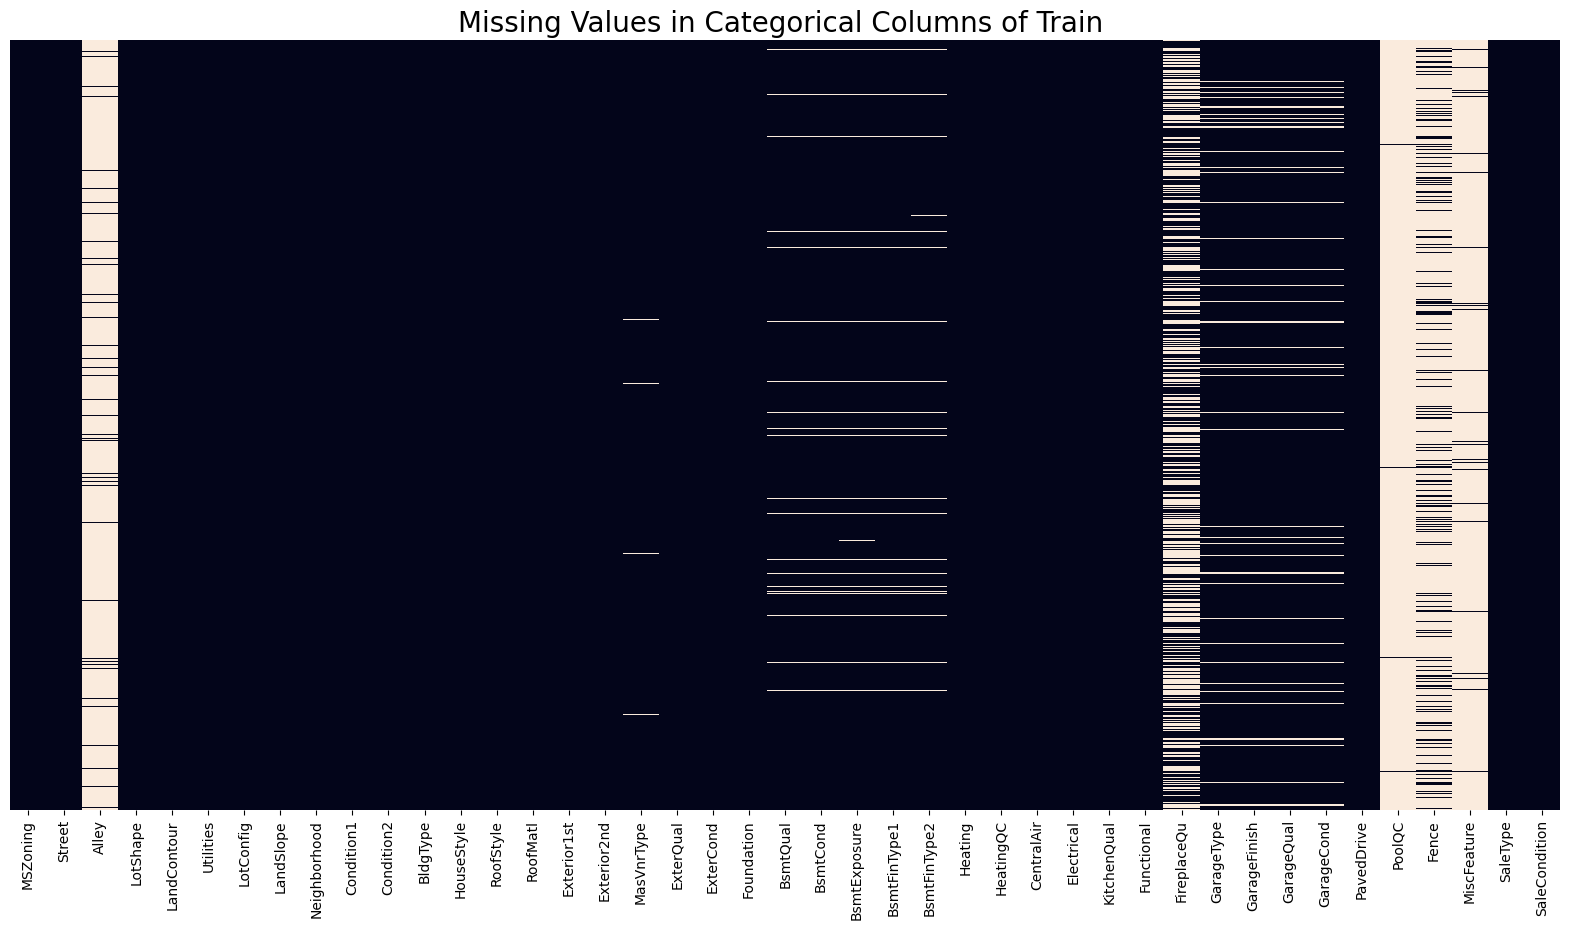

Alley 0.9376712328767123
MasVnrType 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [10]:
plt.figure(figsize=(20,10))
plt.title("Missing Values in Categorical Columns of Train ",fontsize= 20)
sns.heatmap(train[categorical_cols].isnull(),yticklabels=False,cbar=False)
plt.show()
ll11 =[]
for i in categorical_cols:
    mis_per = train[i].isnull().mean()
    if mis_per> 0:
        print(i, mis_per)
        ll11.append(i)

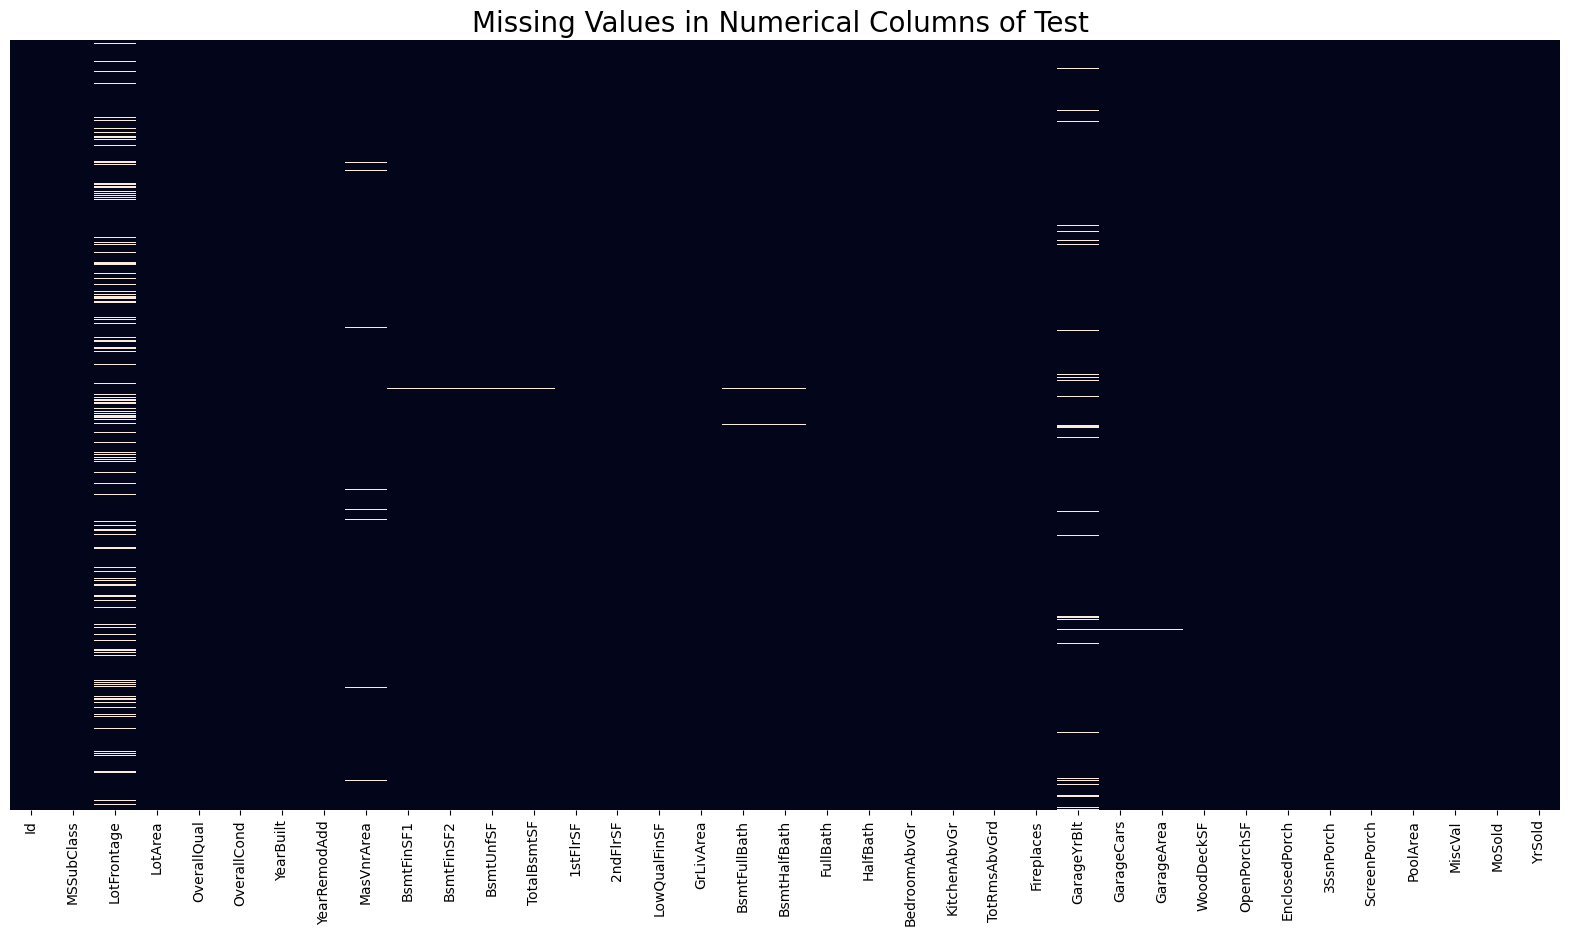

LotFrontage 0.15558601782042494
MasVnrArea 0.01028101439342015
BsmtFinSF1 0.0006854009595613434
BsmtFinSF2 0.0006854009595613434
BsmtUnfSF 0.0006854009595613434
TotalBsmtSF 0.0006854009595613434
BsmtFullBath 0.0013708019191226869
BsmtHalfBath 0.0013708019191226869
GarageYrBlt 0.053461274845784786
GarageCars 0.0006854009595613434
GarageArea 0.0006854009595613434


In [11]:
plt.figure(figsize=(20,10))
plt.title("Missing Values in Numerical Columns of Test ",fontsize= 20)
sns.heatmap(test[numerical_col].isnull(),yticklabels=False,cbar=False)
plt.show()
num_test =[]
for i in numerical_col:
    mis_per = test[i].isnull().mean()
    
    if mis_per>0:
        print(i,mis_per)
        num_test.append(i)

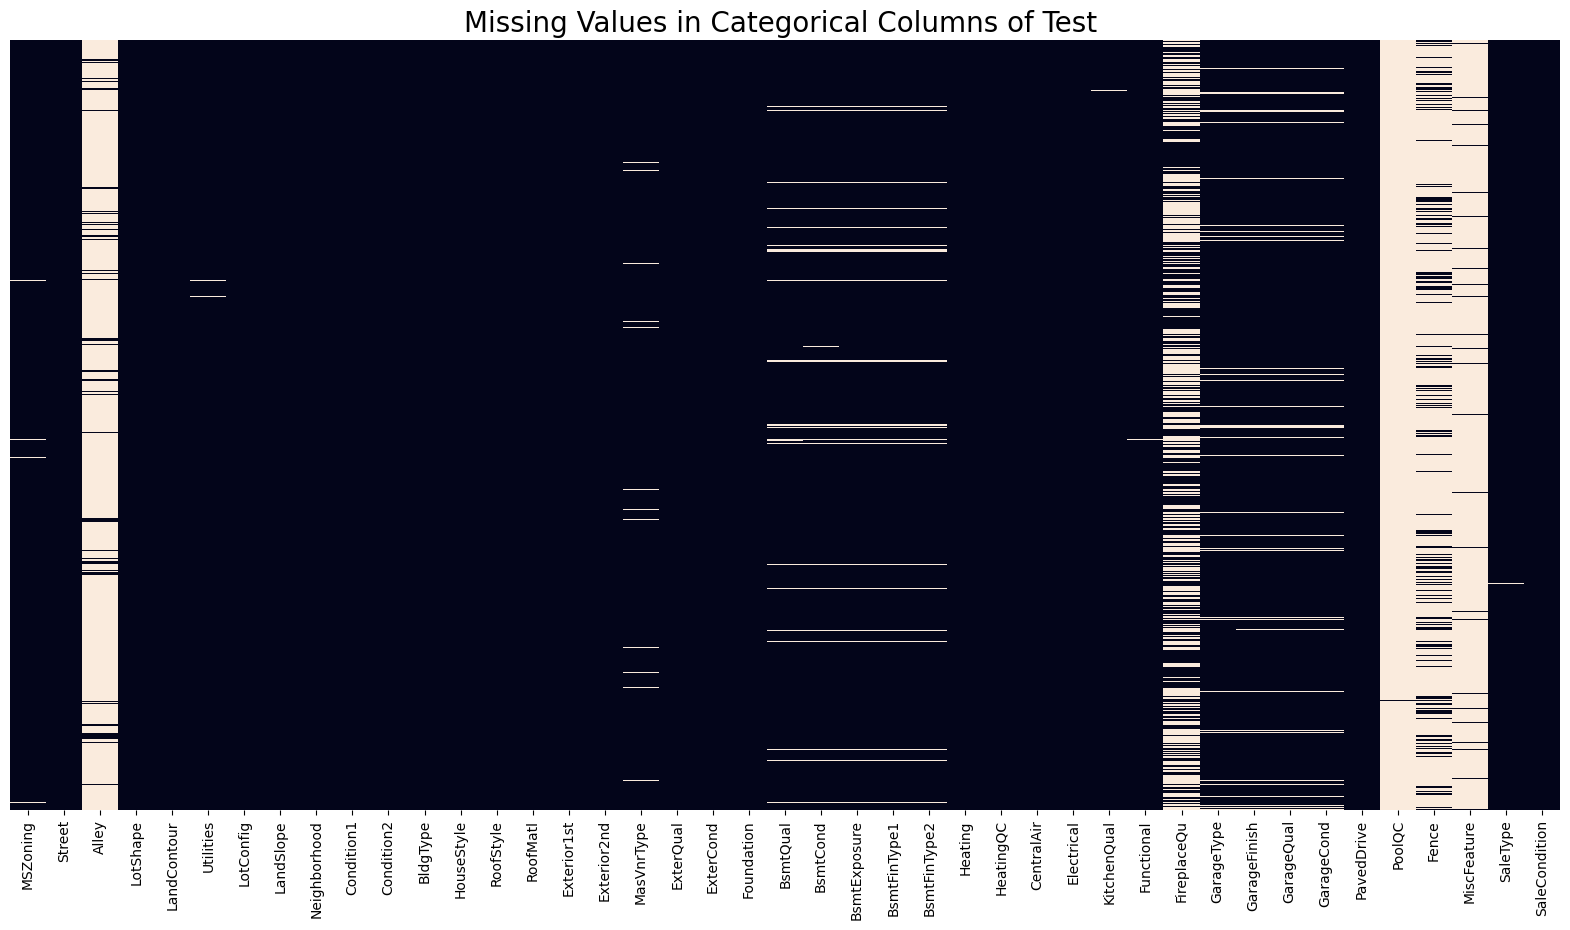

MSZoning 0.0027416038382453737
Alley 0.9266620973269363
Utilities 0.0013708019191226869
Exterior1st 0.0006854009595613434
Exterior2nd 0.0006854009595613434
MasVnrType 0.010966415352981495
BsmtQual 0.03015764222069911
BsmtCond 0.030843043180260453
BsmtExposure 0.03015764222069911
BsmtFinType1 0.02878684030157642
BsmtFinType2 0.02878684030157642
KitchenQual 0.0006854009595613434
Functional 0.0013708019191226869
FireplaceQu 0.5003427004797807
GarageType 0.0520904729266621
GarageFinish 0.053461274845784786
GarageQual 0.053461274845784786
GarageCond 0.053461274845784786
PoolQC 0.997943797121316
Fence 0.8012337217272104
MiscFeature 0.9650445510623715
SaleType 0.0006854009595613434


In [12]:
plt.figure(figsize=(20,10))
plt.title("Missing Values in Categorical Columns of Test ",fontsize= 20)
sns.heatmap(test[categorical_cols].isnull(),yticklabels=False,cbar=False)
plt.show()
ll12 =[]
for i in categorical_cols:
    mis_per = test[i].isnull().mean()
    if mis_per> 0:
        print(i,mis_per)
        ll12.append(i)

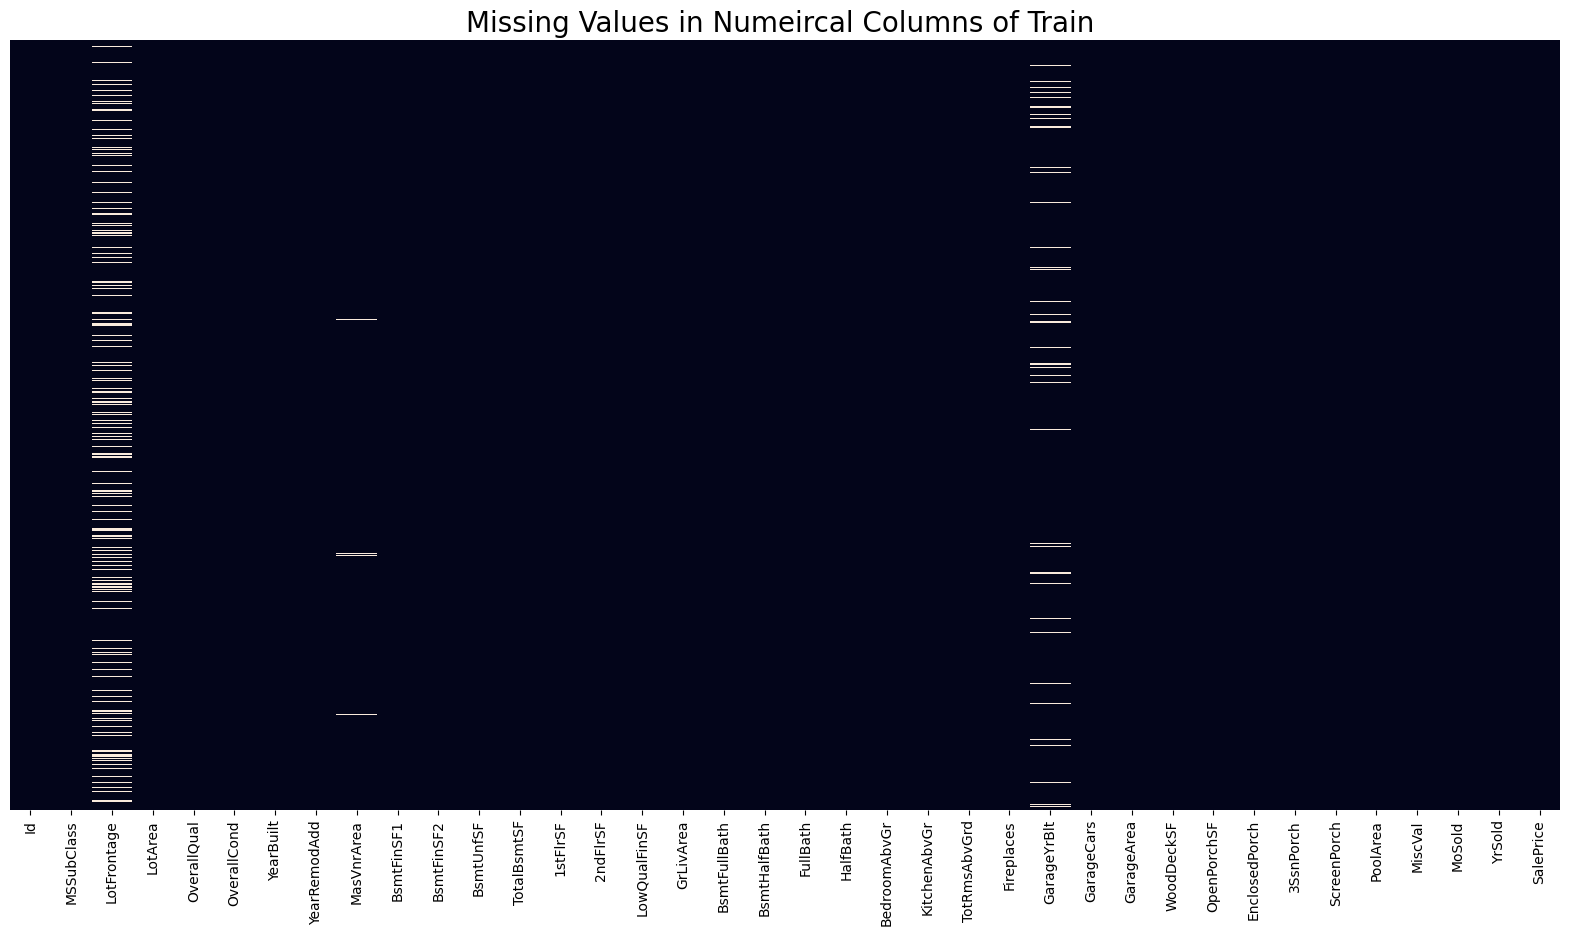

LotFrontage 17.73972602739726
MasVnrArea 0.547945205479452
GarageYrBlt 5.5479452054794525


In [13]:
plt.figure(figsize=(20,10))
plt.title("Missing Values in Numeircal Columns of Train ",fontsize= 20)
sns.heatmap(train[numerical_cols].isnull(),yticklabels=False,cbar=False)
plt.show()
num_train =[]
for i in numerical_cols:
    mis_per = train[i].isnull().mean()*100
    if mis_per>0:
        print(i,mis_per)
        num_train.append(i)

# Description of These Columns
## Alley: Type of alley access


       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

       
## BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
## BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
## BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
	
## BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

## BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


       
## GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage


		
## GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
## GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
## GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

## FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

## Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

## PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

## MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

## Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

## MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
  
## Except 'Electrical' and 'MasVnrType' every other column have another option "NA" which is recongnised as missing value by system. So we will repalce them with "Nor" for all the remaining columns.


In [14]:
ll11.remove('Electrical')
ll11.remove('MasVnrType')
print(ll11)

['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [15]:
for i in ll11:
    train[i].fillna("Nor",inplace= True)
    test[i].fillna("Nor",inplace= True)

In [16]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(strategy="most_frequent")
cll1 = ['Electrical','MasVnrType']

train[cll1] = my_imp.fit_transform(train[cll1])

test[cll1] = my_imp.transform(test[cll1])


In [17]:
train[cll1] = my_imp.fit_transform(train[cll1])
test[cll1] = my_imp.transform(test[cll1])

## Description of Numerical Columns with Missing Values

LotFrontage: Linear feet of street connected to property
MasVnrArea: Masonry veneer area in square feet
GarageYrBlt: Year garage was built


GarageYrBlt have same no of missing value is other Garage features had so we will update this columns as years since the garage was sold and replace missing with 0.

In [18]:
train['GarageYrBlt'].fillna(2023,inplace= True)
train['GarageYrBlt'] = 2023 - train['GarageYrBlt']
test['GarageYrBlt'].fillna(2023,inplace= True)
test['GarageYrBlt'] = 2023 - test['GarageYrBlt']
train['YearBuilt'] = 2023 - train['YearBuilt']
test['YearBuilt'] = 2023 - test['YearBuilt']
train['YearRemodAdd'] = 2023 - train['YearBuilt']
test['YearRemodAdd'] = 2023 - test['YearBuilt']
train['YrSold'] = 2023 - train['YrSold']
test['YrSold'] = 2023 - test['YrSold']

In [19]:
myimp = SimpleImputer(strategy="mean")
train['MasVnrArea']=myimp.fit_transform(train[['MasVnrArea']])
test['MasVnrArea']=myimp.transform(test[['MasVnrArea']])
test['MasVnrArea'].isnull().sum()

0

In [20]:
train['LotFrontage']=myimp.fit_transform(train[['LotFrontage']])
test['LotFrontage']=myimp.transform(test[['LotFrontage']])
test['LotFrontage'].isnull().sum()

0

## Dealing with missing values in Test set only

In [21]:
l3 = []
for i in categorical_cols:
    mis_per = test[i].isnull().mean()*100
    if mis_per> 0:
        print(i,mis_per)
        l3.append(i)
print(l3)

MSZoning 0.2741603838245374
Utilities 0.1370801919122687
Exterior1st 0.06854009595613435
Exterior2nd 0.06854009595613435
KitchenQual 0.06854009595613435
Functional 0.1370801919122687
SaleType 0.06854009595613435
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']


In [22]:
l4 = []
for i in numerical_col:
    mis_per = test[i].isnull().mean()*100
    if mis_per> 0:
        print(i,mis_per)
        l4.append(i)
print(l4)

BsmtFinSF1 0.06854009595613435
BsmtFinSF2 0.06854009595613435
BsmtUnfSF 0.06854009595613435
TotalBsmtSF 0.06854009595613435
BsmtFullBath 0.1370801919122687
BsmtHalfBath 0.1370801919122687
GarageCars 0.06854009595613435
GarageArea 0.06854009595613435
['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']


In [23]:
catimp = SimpleImputer(strategy="most_frequent")
catimp.fit(train[l3])
test[l3] = catimp.transform(test[l3])
myimp = SimpleImputer()
myimp.fit(train[l4])
test[l4] = myimp.transform(test[l4])
test[l3].isnull().sum()

MSZoning       0
Utilities      0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
Functional     0
SaleType       0
dtype: int64

## Visualization

Distribution plots of all numerical columns

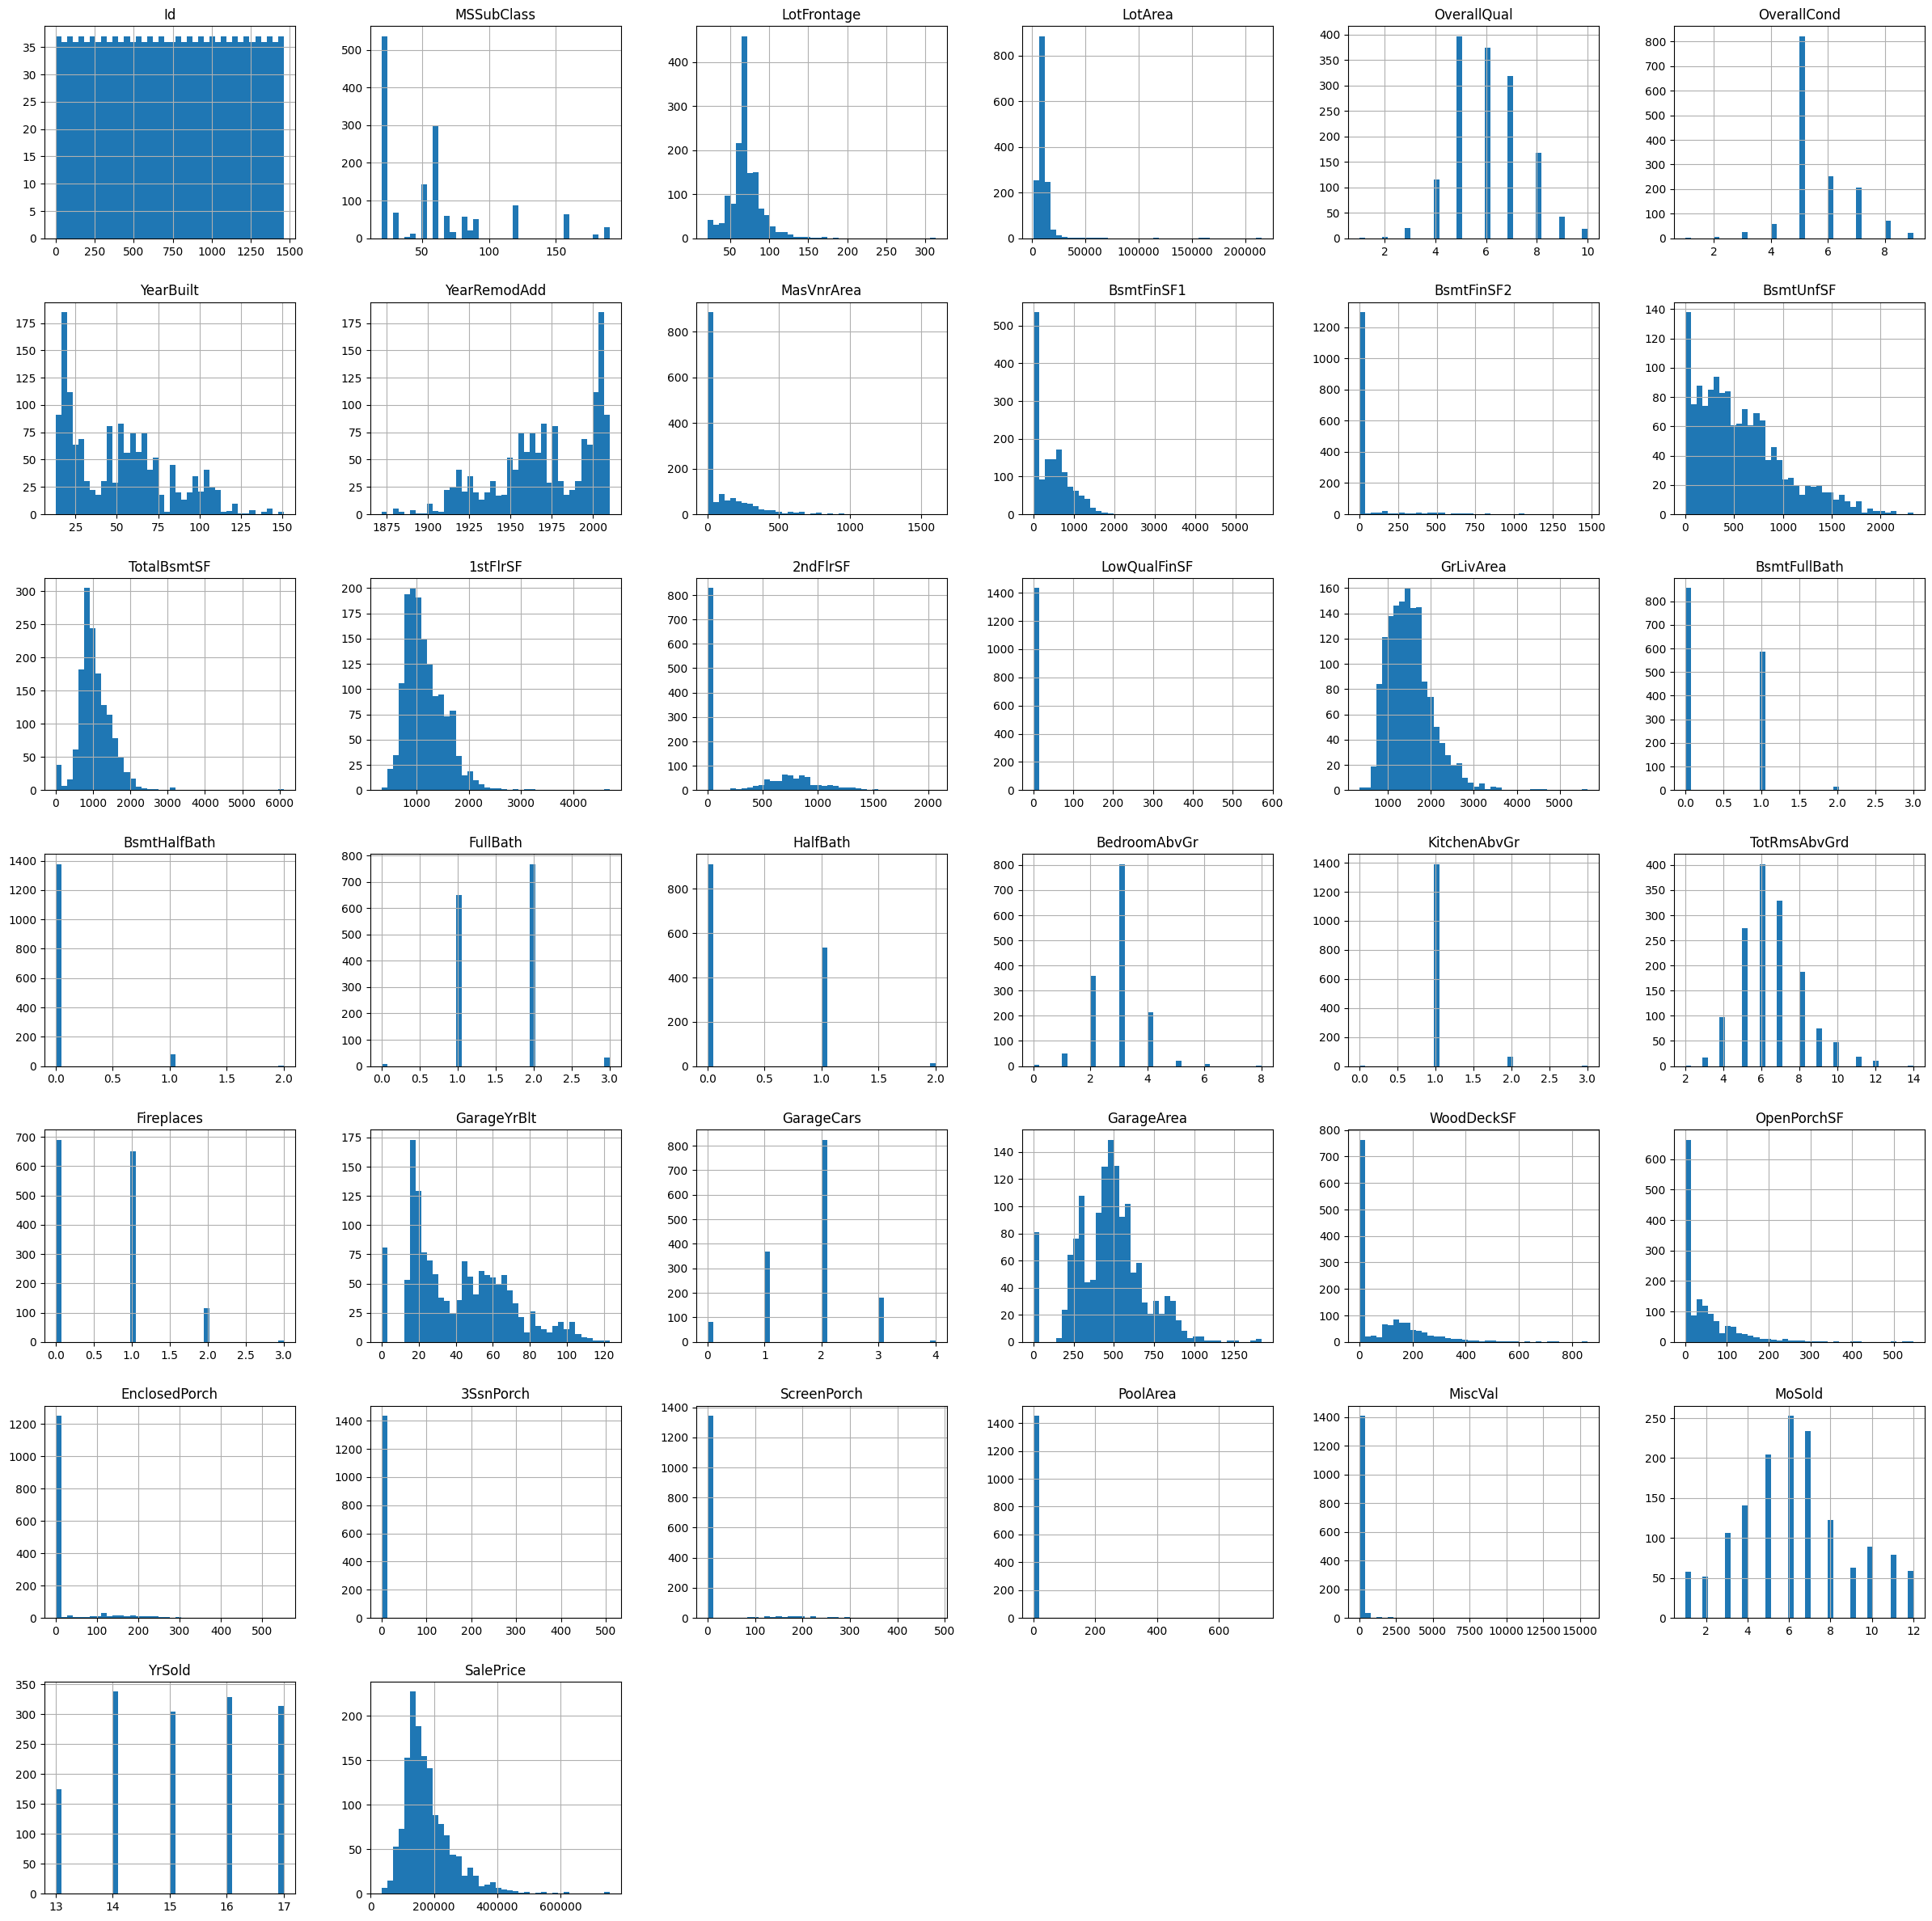

In [24]:
train.hist(figsize = (30, 30), bins = 40)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


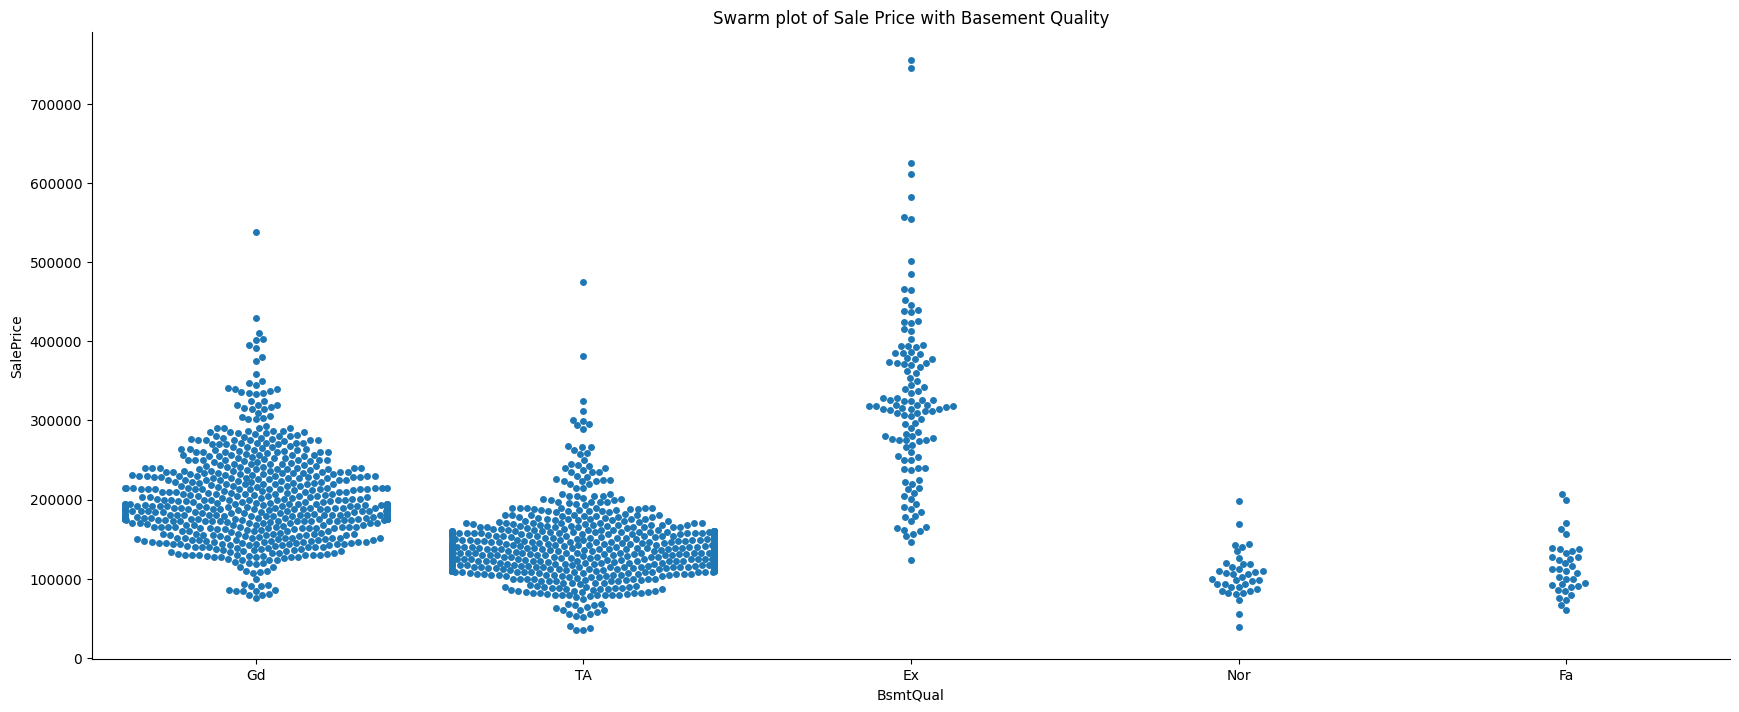

In [25]:
sns.catplot(data=train, x="BsmtQual", y= "SalePrice",kind="swarm",height =7,aspect =2.5).set(title="Swarm plot of Sale Price with Basement Quality")

In [26]:
px.histogram(train, x = "OverallQual", y = "SalePrice",color = "HouseStyle")

/tmp/ipykernel_21/3617509441.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

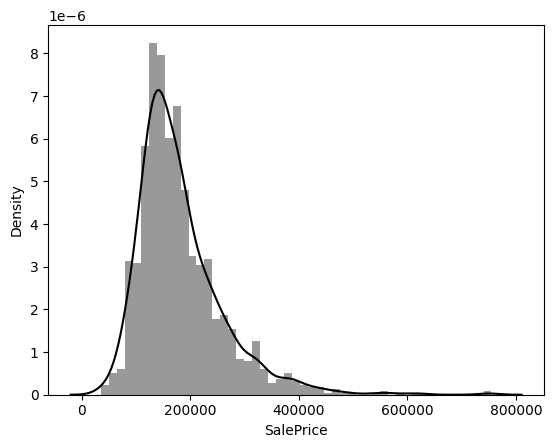

In [27]:
sns.distplot(train["SalePrice"], color = "black")

## Column Transformation

We and already transform columns with year above.
Now we will tranform other columns into more apporipriate form.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		

		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None


SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

train['Time'] = train['YrSold'] - train['YearBuilt']
train['Total_Area'] = train['GrLivArea'] + train['TotalBsmtSF']
train['Final_Area'] = train['Total_Area'] + train['GarageArea']
train['Overall_Plus'] = train['OverallQual'] + train['OverallCond']
train['Area'] = train['Final_Area'] + train['LotArea']

test['Time'] = test['YrSold'] - test['YearBuilt']
test['Total_Area'] = test['GrLivArea'] + test['TotalBsmtSF']
test['Final_Area'] = test['Total_Area'] + test['GarageArea']
test['Overall_Plus'] = test['OverallQual'] + test['OverallCond']
test['Area'] = test['Final_Area'] + test['LotArea']

train.drop(['YrSold','YearBuilt','GrLivArea','TotalBsmtSF','Total_Area','GarageArea','OverallQual','OverallCond','Final_Area'],axis=1,inplace = True)

test.drop(['YrSold','YearBuilt','GrLivArea','TotalBsmtSF','Total_Area','GarageArea','OverallQual','OverallCond','Final_Area'],axis=1,inplace = True)

## Encoding

In [28]:
from sklearn.preprocessing import OrdinalEncoder
label_encoder = OrdinalEncoder()
for i in categorical_cols:
    train[i] = label_encoder.fit_transform(train[[i]])
    test[i] = label_encoder.transform(test[[i]])

In [29]:
print(numerical_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


l1 =['Id','YrSold','YearBuilt','GrLivArea','TotalBsmtSF','GarageArea','OverallQual','OverallCond']
for i in l1:
    numerical_col.remove(i)

l2 = ['Area','Overall_Plus']
for i in l2:
    numerical_col.append(i)

In [30]:
numerical_col.remove('Id')

## Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[numerical_col] = scaler.fit_transform(train[numerical_col])
test[numerical_col] = scaler.transform(test[numerical_col])

In [32]:
train.tail(10).style.background_gradient()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,0.411765,3.000000,0.133562,0.035991,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,12.000000,2.000000,2.000000,2.000000,5.000000,0.444444,0.500000,0.260870,0.739130,1.000000,1.000000,12.000000,13.000000,2.000000,0.000000,3.000000,4.000000,1.000000,2.000000,4.000000,3.000000,6.000000,0.000000,6.000000,0.000000,0.383562,0.146645,1.000000,4.000000,1.000000,4.000000,0.128958,0.433898,0.000000,0.274680,0.000000,0.000000,0.666667,1.000000,0.500000,0.666667,3.000000,0.500000,6.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,2.000000,0.037340,0.082267,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.727273,0.250000,8.000000,4.000000,136000
1451,1452,0.000000,3.000000,0.195205,0.037215,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,21.000000,2.000000,2.000000,0.000000,2.000000,0.777778,0.500000,0.014493,0.985507,1.000000,1.000000,5.000000,5.000000,3.000000,0.121250,2.000000,4.000000,2.000000,2.000000,4.000000,3.000000,6.000000,0.000000,6.000000,0.000000,0.673373,0.257447,1.000000,0.000000,1.000000,4.000000,0.285452,0.000000,0.000000,0.234363,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,0.000000,0.416667,6.000000,0.333333,2.000000,1.000000,0.121951,0.000000,0.750000,0.592384,5.000000,5.000000,2.000000,0.000000,0.065814,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.363636,0.250000,6.000000,5.000000,287090
1452,1453,0.941176,4.000000,0.047945,0.011101,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,7.000000,2.000000,2.000000,4.000000,7.000000,0.444444,0.500000,0.036232,0.963768,1.000000,1.000000,12.000000,13.000000,1.000000,0.050000,3.000000,4.000000,2.000000,2.000000,4.000000,1.000000,2.000000,0.096917,6.000000,0.000000,0.000000,0.089525,1.000000,2.000000,1.000000,4.000000,0.169344,0.000000,0.000000,0.139035,0.333333,0.000000,0.333333,0.000000,0.250000,0.333333,3.000000,0.250000,6.000000,0.000000,3.000000,2.000000,0.146341,0.000000,0.500000,0.370240,5.000000,5.000000,2.000000,0.000000,0.051188,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.363636,1.000000,8.000000,4.000000,145000
1453,1454,0.000000,3.000000,0.236301,0.074398,1.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,11.000000,2.000000,2.000000,0.000000,2.000000,0.444444,0.500000,0.028986,0.971014,1.000000,1.000000,12.000000,13.000000,2.000000,0.000000,3.000000,4.000000,2.000000,2.000000,4.000000,3.000000,6.000000,0.000000,6.000000,0.000000,0.488014,0.186579,1.000000,0.000000,1.000000,4.000000,0.184947,0.000000,0.000000,0.151846,0.000000,0.000000,0.333333,0.000000,0.375000,0.333333,3.000000,0.333333,6.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,2.000000,0.042007,0.102377,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,0.000000,0.545455,1.000000,8.000000,0.000000,84500
1454,1455,0.000000,1.000000,0.140411,0.028979,1.000000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,21.000000,2.000000,2.000000,0.000000,2.000000,0.666667,0.500000,0.043478,0.956522,1.000000,1.000000,12.000000,13.00

In [33]:
corr_df = train.corr()
low_corr =corr_df.index[abs(corr_df["SalePrice"]) < 0.4].to_list()
print(len(low_corr))

62


In [34]:
low_corr.remove("Id")
print(len(low_corr))

61


train.drop(low_corr,axis=1,inplace= True)

test.drop(low_corr,axis=1,inplace= True)

plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

In [35]:
corr_matrix = train.corr()

high_corr_pairs = [(feat1, feat2, corr_matrix.loc[feat1, feat2]) for feat1 in corr_matrix.columns for feat2 in corr_matrix.columns
                   if corr_matrix.loc[feat1, feat2] > 0.7 and feat1 != feat2]

print("Pairs with correlation above 0.7:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")


Pairs with correlation above 0.7:
MSSubClass - BldgType: 0.7460629359877906
BldgType - MSSubClass: 0.7460629359877906
OverallQual - SalePrice: 0.790981600583805
Exterior1st - Exterior2nd: 0.8541629837325787
Exterior2nd - Exterior1st: 0.8541629837325787
TotalBsmtSF - 1stFlrSF: 0.8195299750050328
1stFlrSF - TotalBsmtSF: 0.8195299750050328
GrLivArea - TotRmsAbvGrd: 0.8254893743088413
GrLivArea - SalePrice: 0.7086244776126515
TotRmsAbvGrd - GrLivArea: 0.8254893743088413
GarageCars - GarageArea: 0.8824754142814631
GarageArea - GarageCars: 0.8824754142814631
SalePrice - OverallQual: 0.790981600583805
SalePrice - GrLivArea: 0.7086244776126515


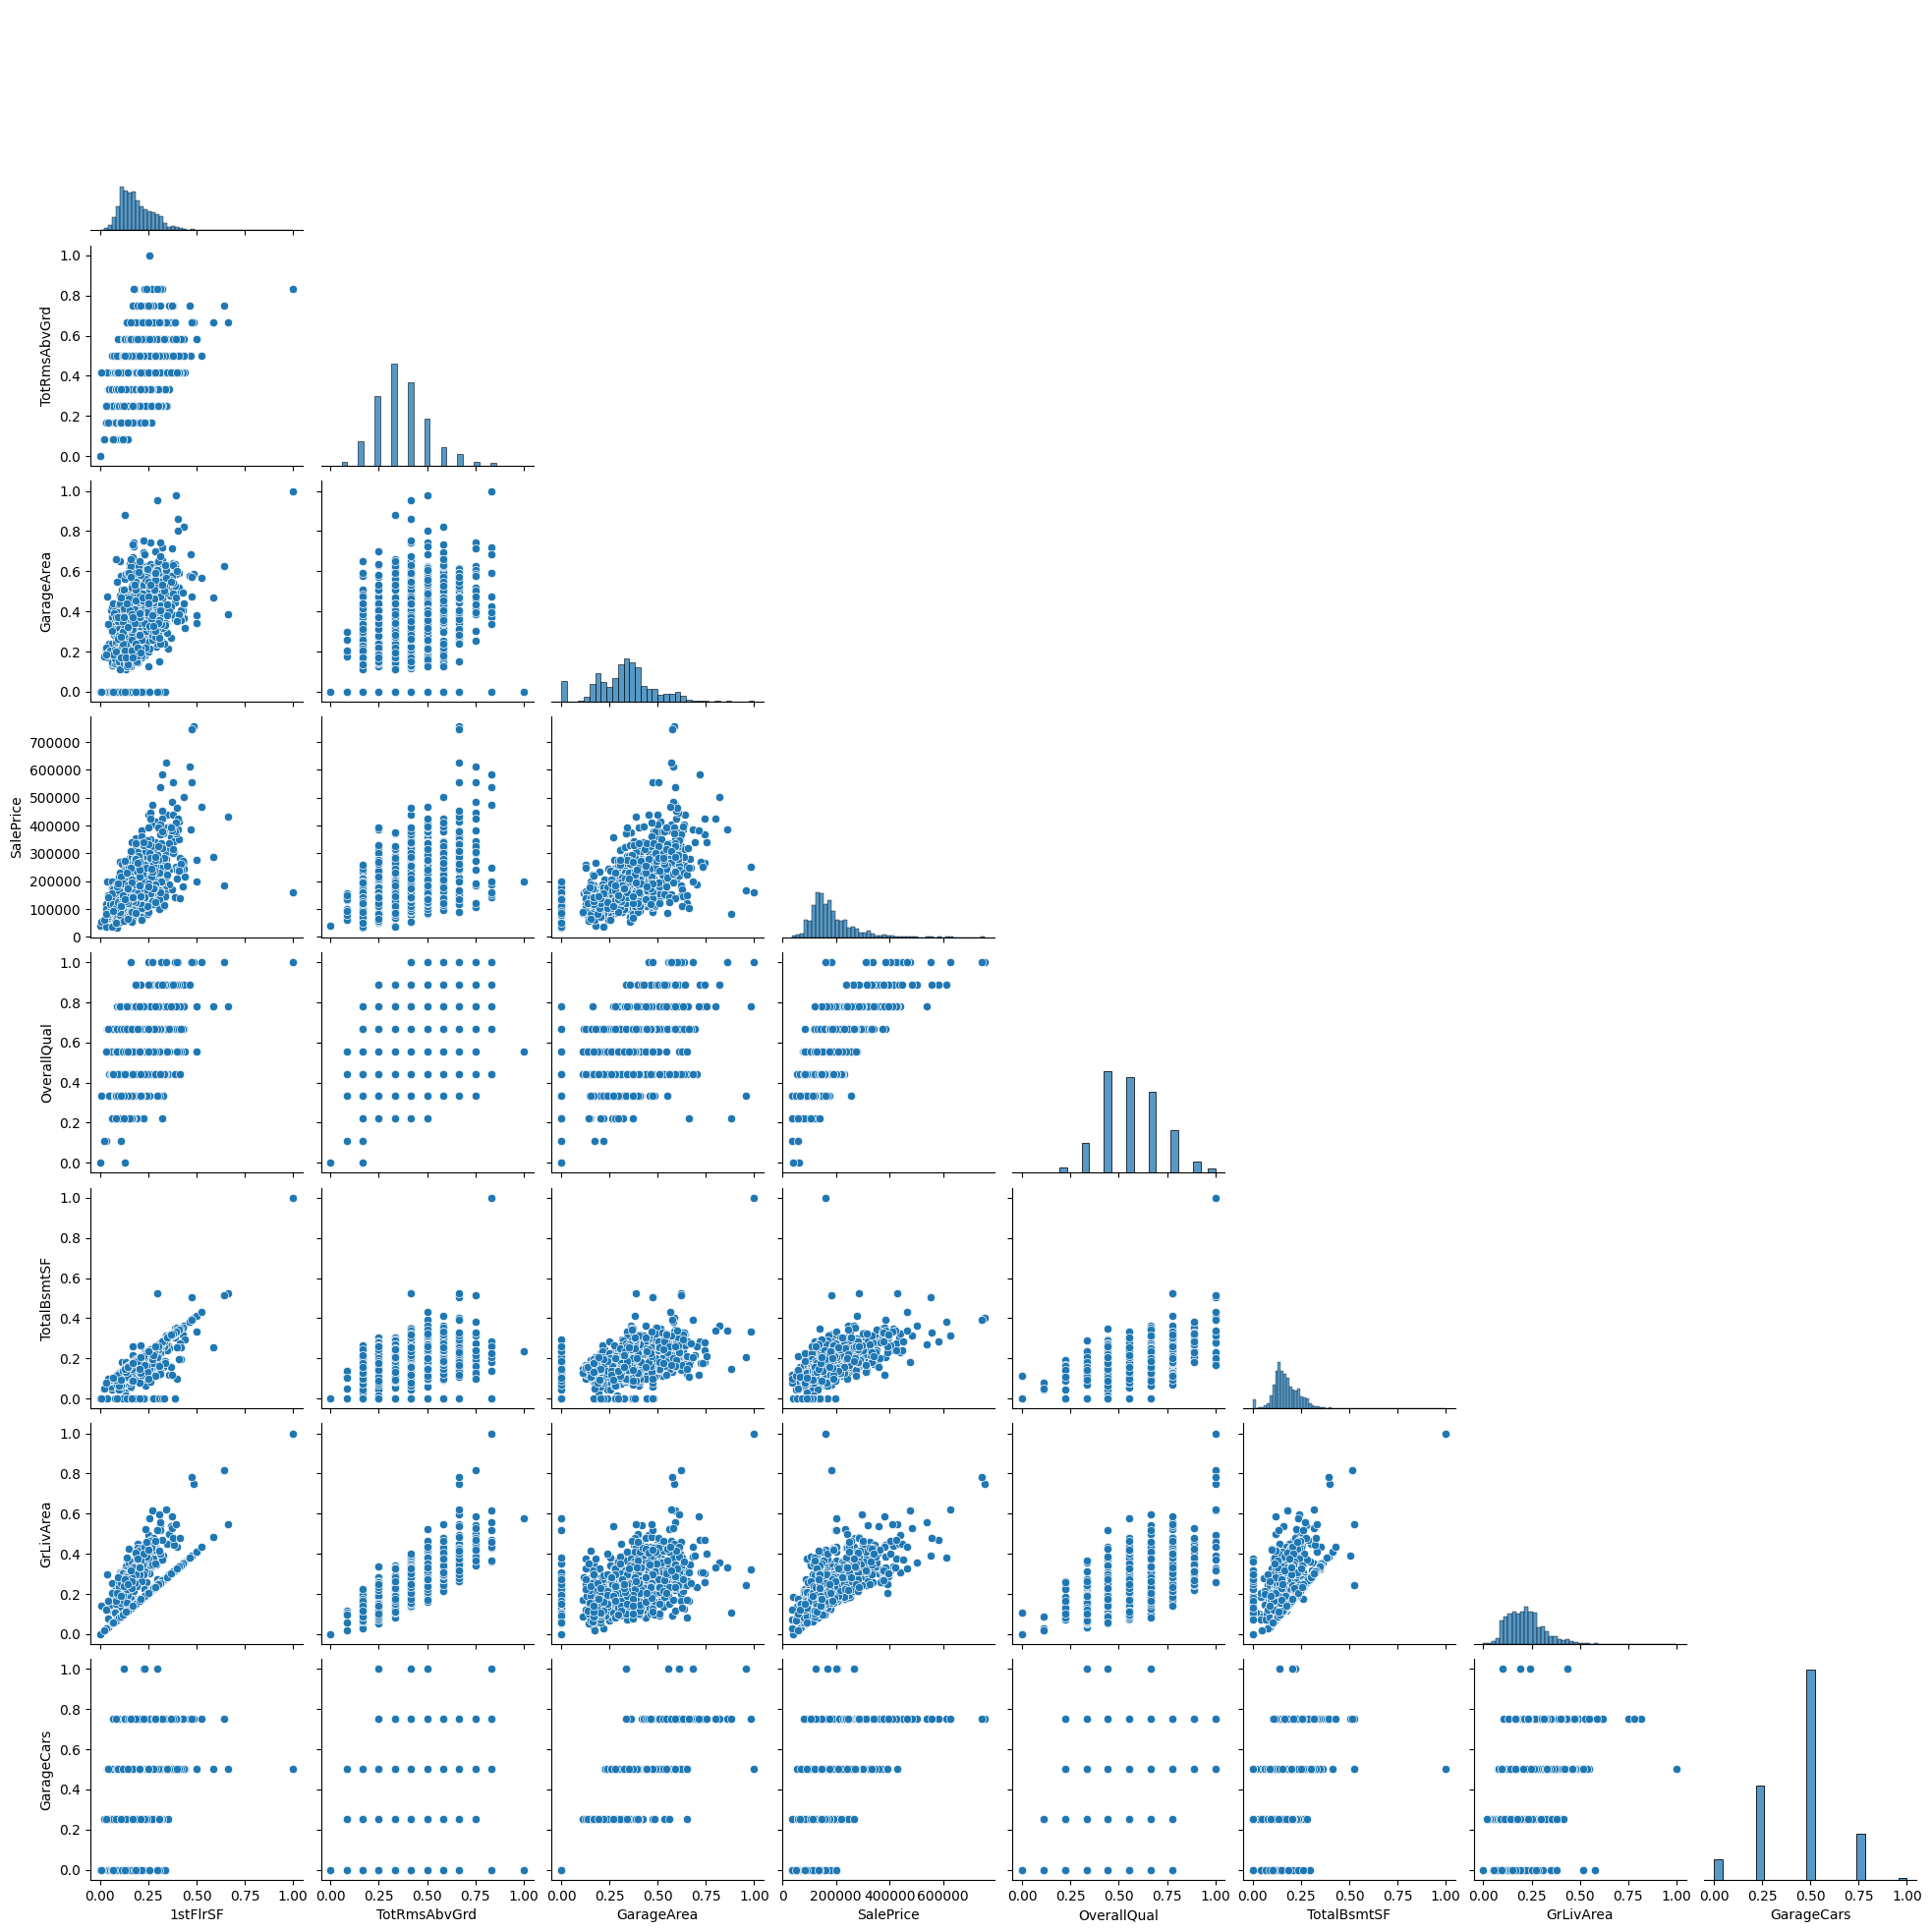

In [36]:
l =['1stFlrSF','TotRmsAbvGrd','GarageArea','SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars']
sns.pairplot(train[l], corner = True)

In [37]:
train.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1,inplace= True)
test.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1,inplace= True)

In [38]:
traindf = train
testdf = test

In [39]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

In [40]:
X = traindf.drop(["Id",'SalePrice'],axis=1)
y = traindf['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X ,y , train_size=0.8 , test_size=0.2, random_state=1)

In [41]:
 def modd(x):
    l = [50,70,100,120,150,180,200]
    for n in l:
        model = x(n_estimators=n)
        cv_scores = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=3)
        test_rmse = np.sqrt(-cv_scores)
        means= test_rmse.mean()
    print(means.mean())

In [42]:
modd(XGBRegressor)

30344.192131815525


In [43]:
modd(RandomForestRegressor)

29780.14160049369


In [44]:
modd(GradientBoostingRegressor)

26657.99503846618


In [45]:
modd(LGBMRegressor)

29388.231404387163


In [46]:
l = [50,70,100,120,150,180,200]
for n in l:
    model = GradientBoostingRegressor(n_estimators=n)
    cv_scores = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=3)
    test_rmse = np.sqrt(-cv_scores)
    print(n,test_rmse.mean())

50 28400.851514061957
70 27879.191338034154
100 28057.26365649157
120 27510.856230566405
150 26961.84070005509
180 27021.79301846912
200 27175.100588627858


In [47]:
X_train, y_train = traindf.drop(["Id", "SalePrice"], axis=1), traindf['SalePrice']
X_test = testdf.drop("Id", axis=1)
model = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
predictions_df = pd.DataFrame({'Id': testdf['Id'], 'SalePrice': y_pred})
predictions_df.to_csv('predictions.csv', index=False)